In [439]:
# Import pandas module and visualizing data module
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [440]:
# import dataset to dataframe
price_df = pd.read_csv("/content/drive/MyDrive/PROJECT BY ME/House_Price_Seattle/train.csv")
price_df.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [441]:
testing_sets = pd.read_csv("/content/drive/MyDrive/PROJECT BY ME/House_Price_Seattle/test.csv")
testing_sets

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


# Exploratory Data Analysis (EDA)

In [442]:
## Check shapes of dataframe
price_df.shape

(2016, 8)

In [443]:
# Info the dataframe
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [444]:
# Select numeric columns and categorical columns

# Numerical feature data types
numerical = price_df.select_dtypes(include=["int", "float"]).columns

# Categorical feature data types
categorical = price_df.select_dtypes(include=["object"]).columns

In [445]:
# Check the name columns
numerical, categorical

(Index(['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price'], dtype='object'),
 Index(['size_units', 'lot_size_units'], dtype='object'))

In [446]:
# Descriptive statistic
price_df.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


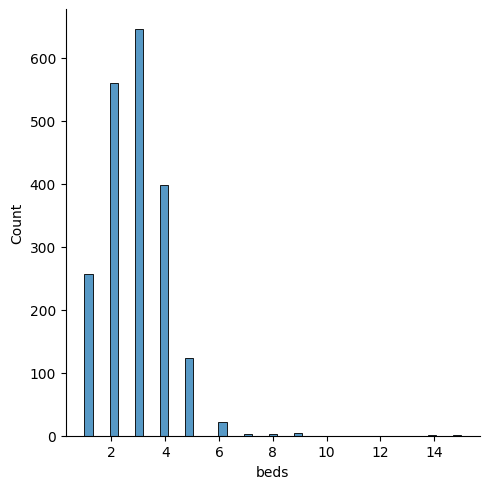

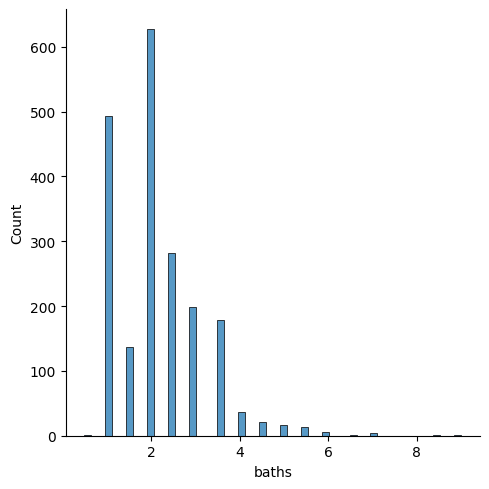

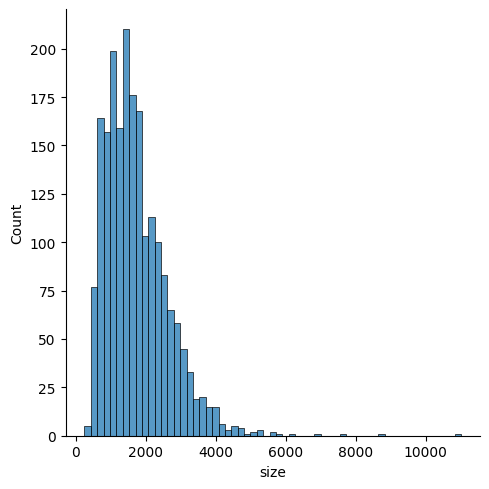

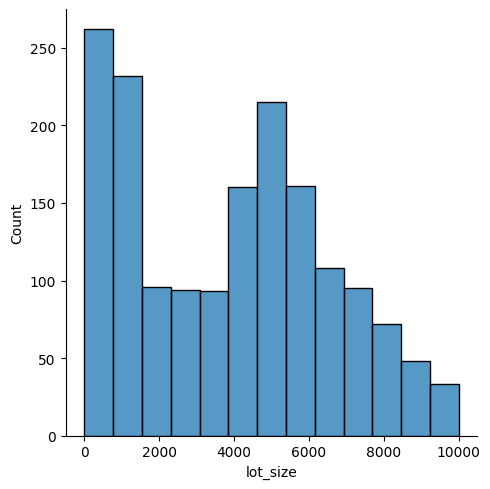

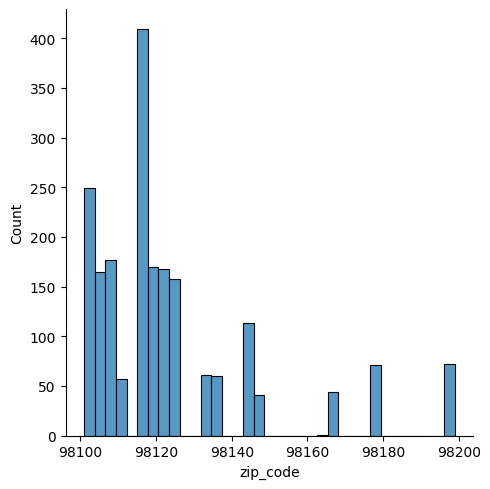

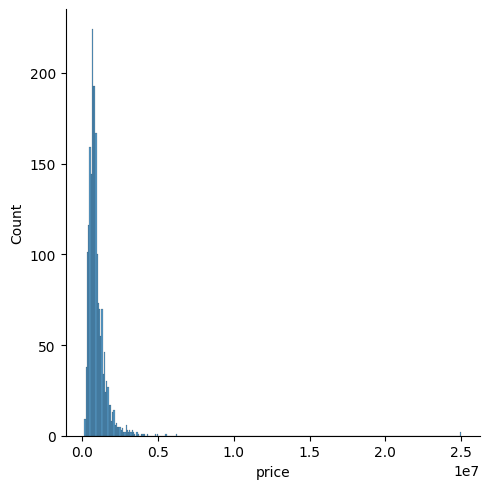

In [447]:
# Visualize the distribution of each column using histogram plot and for checking skewness

for column in price_df:
  if column in numerical:
    sns.displot(data=price_df, x=column)


In [448]:
# Sorted the columns
price_df.sort_values(by=["beds", "baths", "zip_code"], inplace=True)
price_df

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
29,1,1.0,792.0,sqft,NaN,NaN,98101,517000.0
35,1,1.0,474.0,sqft,NaN,NaN,98101,335000.0
375,1,1.0,783.0,sqft,NaN,NaN,98101,530000.0
507,1,1.0,954.0,sqft,NaN,NaN,98101,555000.0
535,1,1.0,808.0,sqft,NaN,NaN,98101,730000.0
...,...,...,...,...,...,...,...,...
429,9,5.0,3940.0,sqft,5303.00,sqft,98133,1089000.0
1338,9,5.0,3014.0,sqft,7908.00,sqft,98178,835000.0
1179,9,9.0,3780.0,sqft,5020.00,sqft,98119,1210000.0
693,14,5.0,3884.0,sqft,4968.00,sqft,98106,1300000.0


In [449]:
# Change data types for beds, baths, and zip code because of they are categorical features
column_changes = ["beds", "baths", "zip_code"]

for column in column_changes:
  price_df[column] = price_df[column].astype(str)
  testing_sets[column] = testing_sets[column].astype(str)

In [450]:
# Data type of columns above have already changed
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 29 to 232
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   object 
 1   baths           2016 non-null   object 
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   object 
 7   price           2016 non-null   float64
dtypes: float64(3), object(5)
memory usage: 141.8+ KB


In [451]:
price_df.tail()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
429,9,5.0,3940.0,sqft,5303.00,sqft,98133,1089000.0
1338,9,5.0,3014.0,sqft,7908.00,sqft,98178,835000.0
1179,9,9.0,3780.0,sqft,5020.00,sqft,98119,1210000.0
693,14,5.0,3884.0,sqft,4968.00,sqft,98106,1300000.0
232,15,6.0,11010.0,sqft,0.33,acre,98112,3700000.0


<Axes: xlabel='lot_size_units', ylabel='count'>

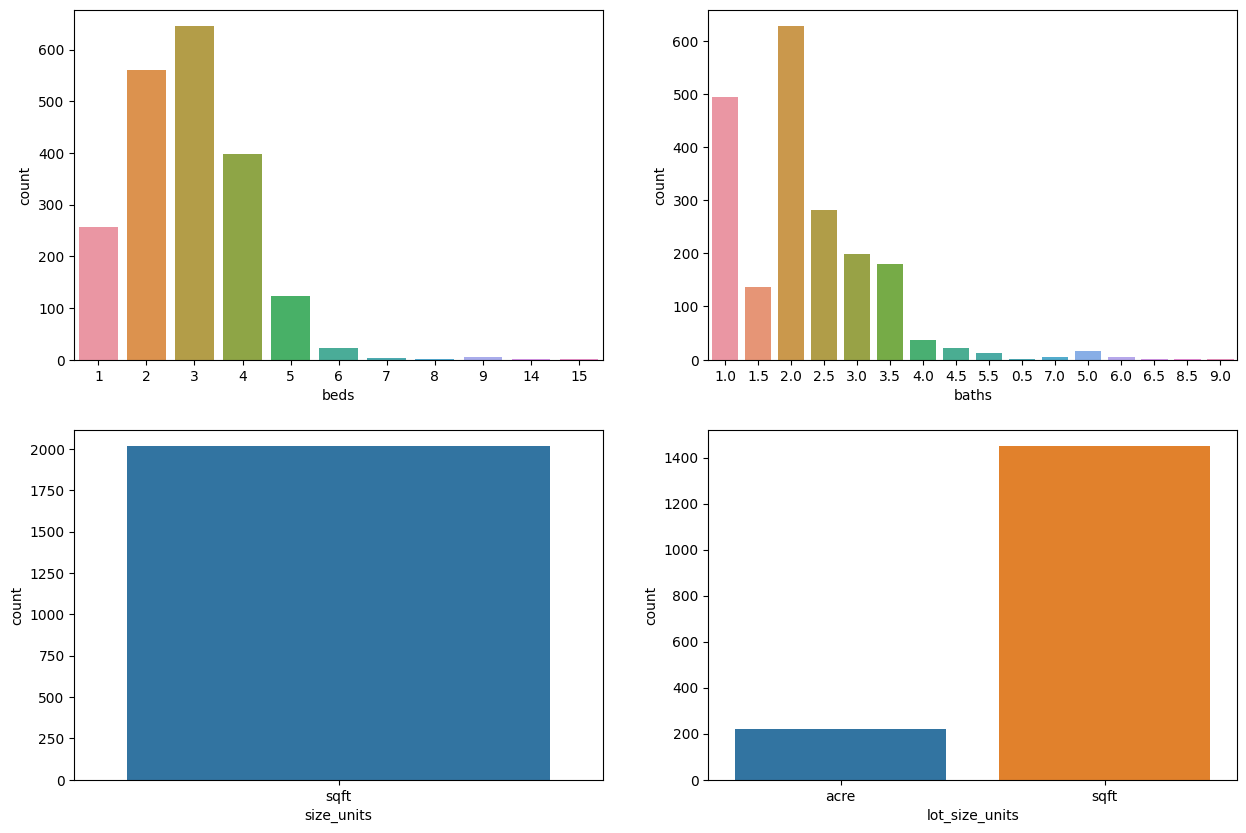

In [452]:
# Using count plot for beds, baths, size_units, and lot size units
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(data=price_df, x="beds",ax=ax[0][0])
sns.countplot(data=price_df, x="baths", ax=ax[0][1])
sns.countplot(data=price_df, x="size_units", ax=ax[1][0])
sns.countplot(data=price_df, x="lot_size_units", ax=ax[1][1])

<Axes: title={'center': 'Beds vs Price'}, xlabel='beds', ylabel='price'>

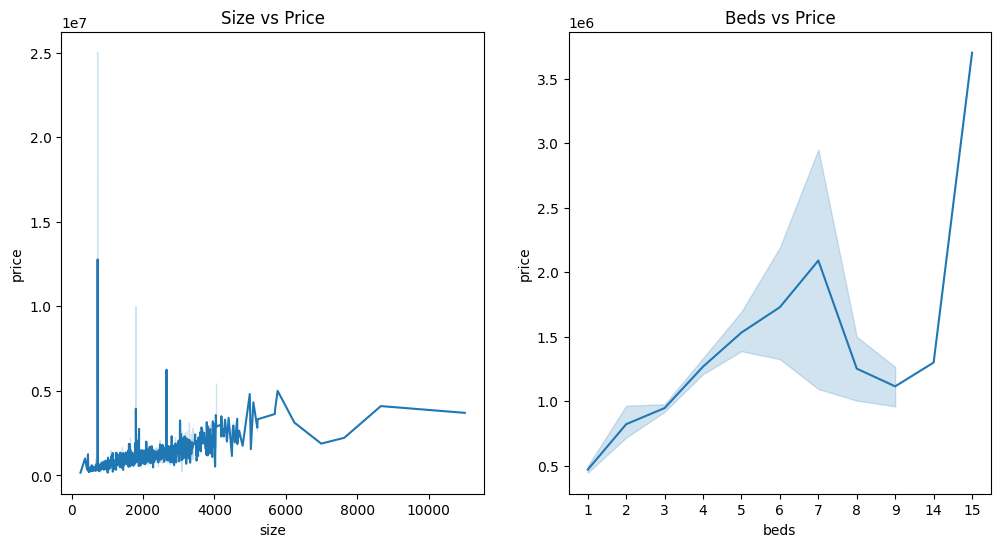

In [453]:
# Check the relation between size and price

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title("Size vs Price")
ax[1].set_title("Beds vs Price")

sns.lineplot(data=price_df, x="size", y="price", ax=ax[0])
sns.lineplot(data=price_df, x="beds", y="price", ax=ax[1])

<ipython-input-454-925b8b58bb6d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = price_df.corr()


<Axes: >

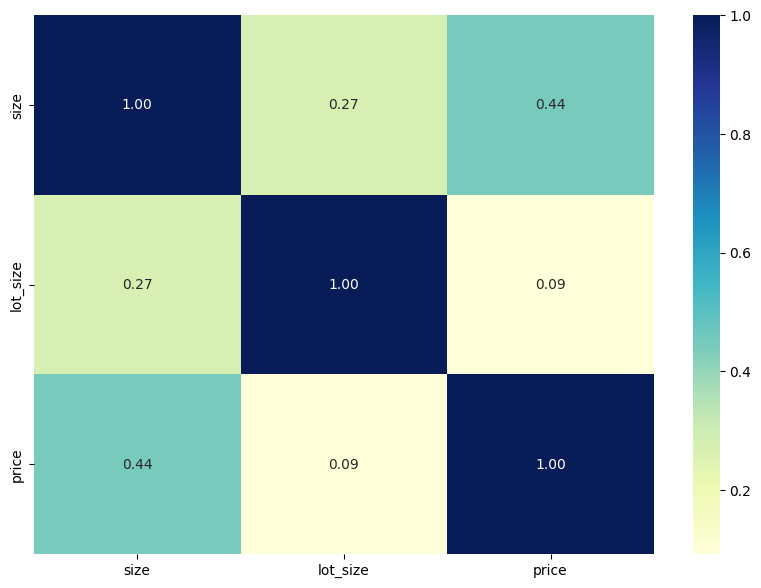

In [454]:
# Checking heatmap

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

corr_matrix = price_df.corr()
sns.heatmap(data=corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")

# Pre-Processing

## Check missing values

In [455]:
# Check missing values for training dataframe
price_df.isna().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [456]:
# Check missing values for testing dataframe
testing_sets.isna().sum()

beds               0
baths              0
size               0
size_units         0
lot_size          77
lot_size_units    77
zip_code           0
price              0
dtype: int64

In [457]:
# Missing values in this training sets
mv = price_df.isna().sum()["lot_size"] # mv means missing values

print(f"Percentage of missing values is: {mv/len(price_df) * 100:.2f}")

Percentage of missing values is: 17.21


In [458]:
# Missing values in this testing sets
mv = testing_sets.isna().sum()["lot_size"] # mv means missing values

print(f"Percentage of missing values is: {mv/len(testing_sets) * 100:.2f}")

Percentage of missing values is: 15.25


From this missing values, we assume to fill all the missing values because of missing values is under 50%

In [459]:
# Fill all the missing values with mean of each columns

# Fill lot size columns with mean for missing values
mean_lot_size_train = price_df["lot_size"].mean()
mean_lot_size_test = testing_sets["lot_size"].mean()

price_df["lot_size"].fillna(mean_lot_size_train, inplace=True)
testing_sets["lot_size"].fillna(mean_lot_size_test, inplace=True)

# Fill lot size units columns with mode for missing values
mode_lot_size_units_train = price_df["lot_size_units"].mode().iloc[0]
mode_lot_size_units_test = testing_sets["lot_size_units"].mode().iloc[0]

price_df["lot_size_units"].fillna(mode_lot_size_units_train, inplace=True)
testing_sets["lot_size_units"].fillna(mode_lot_size_units_test, inplace=True)

In [460]:
# Re-check again the missing values after filling
price_df.isna().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [461]:
# Re-check again the missing values after filling
testing_sets.isna().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

## Check duplicated data

In [462]:
# Check duplicated data in training sets
price_df.duplicated().sum()

9

In [463]:
# Check duplicated data in testing sets
testing_sets.duplicated().sum()

1

In [464]:
# Removes all duplicated data in training sets
price_df.drop_duplicates(inplace=True)

In [465]:
# Removes all duplicated data in testing sets
testing_sets.drop_duplicates(inplace=True)

In [466]:
price_df.duplicated().sum()

0

In [467]:
testing_sets.duplicated().sum()

0

In [468]:
price_df.shape, testing_sets.shape

((2007, 8), (504, 8))

In [469]:
X_train = price_df.drop("price", axis=1)
X_train.isna().sum(), X_train.duplicated().sum()

(beds              0
 baths             0
 size              0
 size_units        0
 lot_size          0
 lot_size_units    0
 zip_code          0
 dtype: int64,
 30)

## One Hot Encoding, Feature Scaling, and Splitting data into training, validating sets

We do one hot encoder for categorical columns like `beds, baths, size_units, lot_size_units, zip_code` and for increase performance the model while training, we do MinMaxScaler to `size, lot_size` because of the scale of these columns are difference

In [470]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np


# Create column transformer
ct = make_column_transformer((MinMaxScaler(), ["size", "lot_size"]),
                            (OneHotEncoder(handle_unknown="ignore"), ["beds", "baths", "size_units", "lot_size_units", "zip_code"]))

# Create X and y
X = price_df.drop("price", axis=1)
y = price_df["price"]

# Split the data into training and validating sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform the training and validating sets
X_train_normal = ct.transform(X_train).toarray()
X_val_normal = ct.transform(X_val).toarray()

In [471]:
pd.DataFrame(X_train_normal)

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.142193,0.480084,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.037175,0.378061,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.088197,0.000083,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.196097,0.660124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.071654,0.387169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,0.141264,0.334952,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1601,0.131970,0.130406,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1602,0.105948,0.309046,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1603,0.148699,0.450077,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [472]:
X_train

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code
511,3,1.5,1780.0,sqft,4800.000000,sqft,98126
422,2,1.0,650.0,sqft,3780.000000,sqft,98103
1056,2,2.0,1199.0,sqft,1.060000,acre,98117
50,3,3.0,2360.0,sqft,6600.000000,sqft,98117
710,1,1.5,1021.0,sqft,3871.059694,sqft,98101
...,...,...,...,...,...,...,...
36,3,2.0,1770.0,sqft,3349.000000,sqft,98146
983,3,2.5,1670.0,sqft,1304.000000,sqft,98144
1509,3,1.0,1390.0,sqft,3090.000000,sqft,98144
1978,4,1.0,1850.0,sqft,4500.000000,sqft,98118


# Build Neural Network

We do 5 experiments until get best loss results

In [473]:
# Create a function to visualize loss and metrics

def plot_loss_metrics(records):
  all_history  = pd.DataFrame(records.history)

  fig, ax = plt.subplots(1,
                         2,
                         figsize=(15, 5))

  # Plot for loss
  ax[0].plot(all_history.index, all_history["loss"], label="Training loss")
  ax[0].plot(all_history.index, all_history["val_loss"], label="Testing loss")

  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Loss")

  ax[0].legend()

  # Plot for metrics
  ax[1].plot(all_history.index, all_history["mse"], label="Training MSE")
  ax[1].plot(all_history.index, all_history["val_mse"], label="Testing MSE")

  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("MSE")

  # Add legend
  ax[1].legend()


## First Model
Build a simple neural network
* 1 Hidden layer with 10 neurons
* 100 epochs for training data
* Using SGD for optimizer

In [474]:
# import tensorflow module
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(10),
              tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
history_1 = model_1.fit(X_train_normal, y_train, epochs=100, validation_data=(X_val_normal, y_val))

Epoch 1/100
51/51 [==============================] - 1s 9ms/step - loss: 956148.3750 - mse: 1590673145856.0000 - val_loss: 995677.1250 - val_mse: 2756200628224.0000
Epoch 2/100
51/51 [==============================] - 0s 5ms/step - loss: 956128.3125 - mse: 1590635266048.0000 - val_loss: 995632.5625 - val_mse: 2756112285696.0000
Epoch 3/100
51/51 [==============================] - 0s 5ms/step - loss: 956004.6250 - mse: 1590401433600.0000 - val_loss: 995346.0625 - val_mse: 2755541336064.0000
Epoch 4/100
51/51 [==============================] - 0s 6ms/step - loss: 955201.0625 - mse: 1588843380736.0000 - val_loss: 993480.4375 - val_mse: 2751827804160.0000
Epoch 5/100
51/51 [==============================] - 0s 4ms/step - loss: 949957.6875 - mse: 1578972610560.0000 - val_loss: 981281.5625 - val_mse: 2727717634048.0000
Epoch 6/100
51/51 [==============================] - 0s 4ms/step - loss: 915667.6875 - mse: 1515030708224.0000 - val_loss: 901700.3125 - val_mse: 2577826578432.0000
Epoch 7/10

In [475]:
# Evaluate the model
model_1.evaluate(X_val_normal, y_val)

13/13 [==============================] - 0s 2ms/step - loss: 285417.9375 - mse: 1614686715904.0000


[285417.9375, 1614686715904.0]

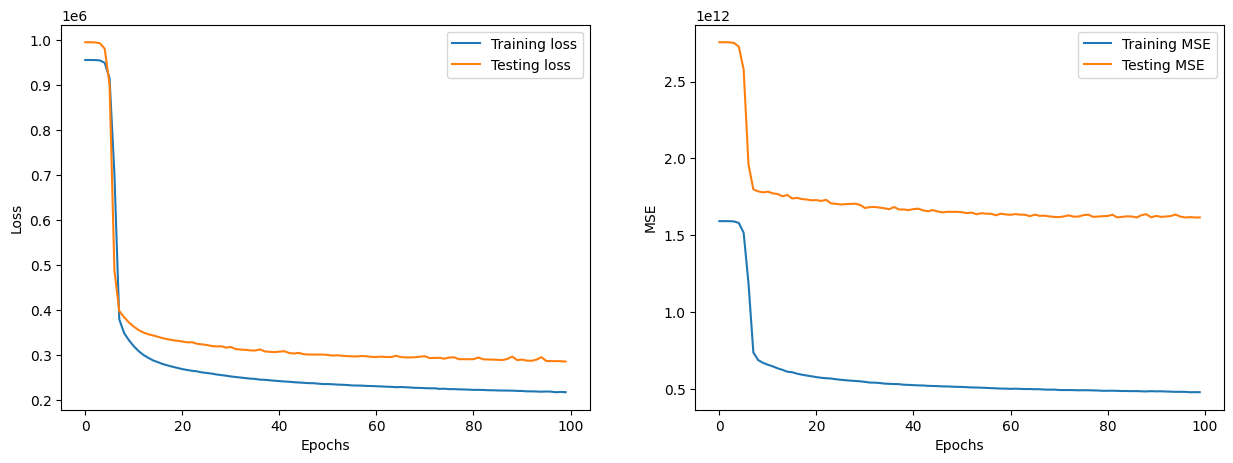

In [476]:
plot_loss_metrics(history_1)

## Second Model
Same as above, but we changes some:
* Add neurons into 100
* Add new hidden layers
* Change the optimizer into Adam and learning rate is 0.01


In [477]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
              tf.keras.layers.Dense(100),
              tf.keras.layers.Dense(10),
              tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mse"])

# 3. Fit the model
history_2 = model_2.fit(X_train_normal, y_train, epochs=100, validation_data=(X_val_normal, y_val))


Epoch 1/100
51/51 [==============================] - 1s 6ms/step - loss: 955613.1250 - mse: 1589628764160.0000 - val_loss: 993257.3750 - val_mse: 2751366692864.0000
Epoch 2/100
51/51 [==============================] - 0s 3ms/step - loss: 945301.9375 - mse: 1570012528640.0000 - val_loss: 968786.4375 - val_mse: 2703140323328.0000
Epoch 3/100
51/51 [==============================] - 0s 3ms/step - loss: 895076.8125 - mse: 1477895782400.0000 - val_loss: 882734.8125 - val_mse: 2543135490048.0000
Epoch 4/100
51/51 [==============================] - 0s 3ms/step - loss: 761836.6875 - mse: 1255292534784.0000 - val_loss: 691361.8125 - val_mse: 2238308417536.0000
Epoch 5/100
51/51 [==============================] - 0s 3ms/step - loss: 530481.7500 - mse: 940687097856.0000 - val_loss: 455757.1875 - val_mse: 1910353035264.0000
Epoch 6/100
51/51 [==============================] - 0s 3ms/step - loss: 374157.9688 - mse: 724232241152.0000 - val_loss: 390877.0625 - val_mse: 1789160194048.0000
Epoch 7/100


In [478]:
# Evaluate the model
model_2.evaluate(X_val_normal, y_val)

13/13 [==============================] - 0s 2ms/step - loss: 287273.2188 - mse: 1611865784320.0000


[287273.21875, 1611865784320.0]

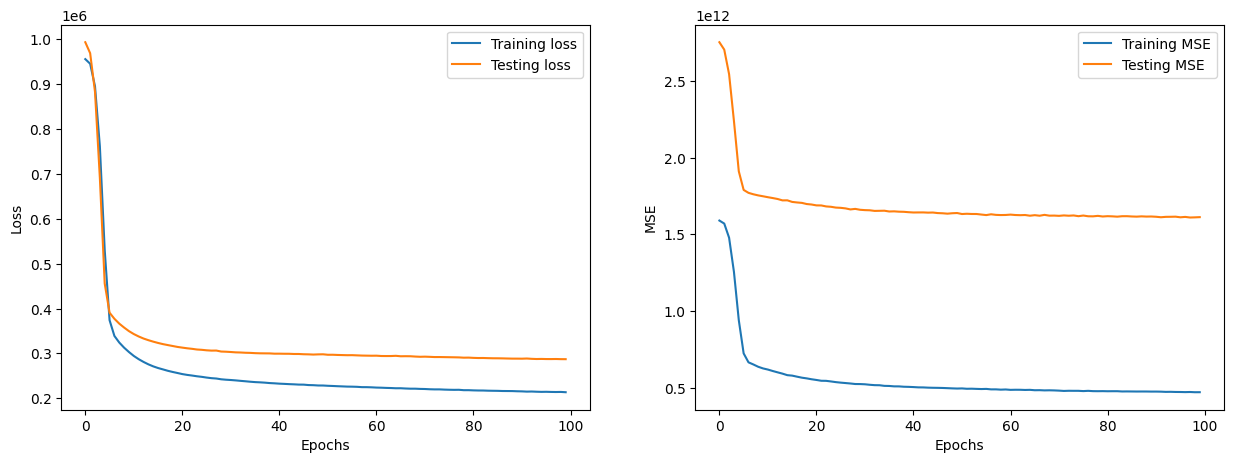

In [479]:
plot_loss_metrics(history_2)

## Third model
Same as above, but we do this:
* Add epochs into 500
* Neurons set to 50

In [480]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
            tf.keras.layers.Dense(100),
            tf.keras.layers.Dense(50),
            tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(0.01),
                metrics=["mse"])

# 3. Fit the model
history_3 = model_3.fit(X_train_normal, y_train, epochs=300, validation_data=(X_val_normal, y_val))

Epoch 1/300
51/51 [==============================] - 1s 7ms/step - loss: 954199.6250 - mse: 1586868125696.0000 - val_loss: 986139.5625 - val_mse: 2737212751872.0000
Epoch 2/300
51/51 [==============================] - 0s 3ms/step - loss: 908640.0000 - mse: 1502667603968.0000 - val_loss: 873683.4375 - val_mse: 2527113248768.0000
Epoch 3/300
51/51 [==============================] - 0s 4ms/step - loss: 677498.7500 - mse: 1139454246912.0000 - val_loss: 509294.8125 - val_mse: 1985694531584.0000
Epoch 4/300
51/51 [==============================] - 0s 3ms/step - loss: 377974.0625 - mse: 722754535424.0000 - val_loss: 386362.3750 - val_mse: 1771446468608.0000
Epoch 5/300
51/51 [==============================] - 0s 3ms/step - loss: 328445.6875 - mse: 652160204800.0000 - val_loss: 365033.5625 - val_mse: 1761549090816.0000
Epoch 6/300
51/51 [==============================] - 0s 4ms/step - loss: 308186.0625 - mse: 635607515136.0000 - val_loss: 351149.9375 - val_mse: 1746009325568.0000
Epoch 7/300
5

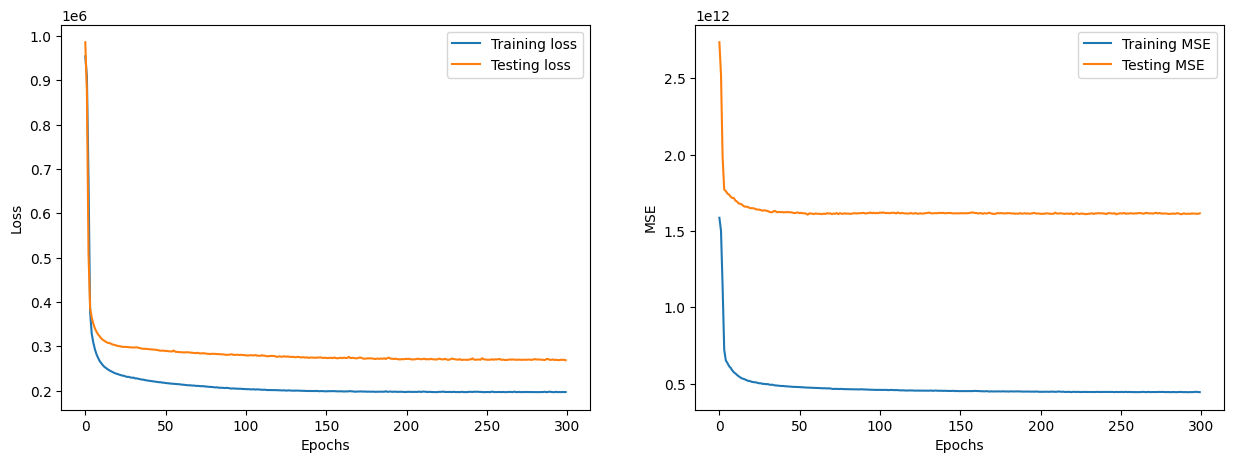

In [481]:
plot_loss_metrics(history_3)

## Overfitting

The model is overfit, i think it's because datasets are too small, so we try to train the model using full dataset and testing by using `testing sets`

We do transform the training and testing sets

In [482]:
price_df.info(), testing_sets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 29 to 232
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2007 non-null   object 
 1   baths           2007 non-null   object 
 2   size            2007 non-null   float64
 3   size_units      2007 non-null   object 
 4   lot_size        2007 non-null   float64
 5   lot_size_units  2007 non-null   object 
 6   zip_code        2007 non-null   object 
 7   price           2007 non-null   float64
dtypes: float64(3), object(5)
memory usage: 141.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            504 non-null    object 
 1   baths           504 non-null    object 
 2   size            504 non-null    float64
 3   size_units      504 non-null    object 
 4   lot_size   

(None, None)

In [483]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np


# Create column transformer
ct = make_column_transformer((MinMaxScaler(), ["size", "lot_size"]),
                            (OneHotEncoder(handle_unknown="ignore"), ["beds", "baths", "size_units", "lot_size_units", "zip_code"]))

# Create training and testing sets
X_train = price_df.drop("price", axis=1)
y_train = price_df["price"]

X_test = testing_sets.drop("price", axis=1)
y_test = testing_sets["price"]


# Fit the column transformer to the training data
ct.fit(X_train)

# Transform the training and testing sets
X_train_normal = ct.transform(X_train).toarray()
X_test_normal = ct.transform(X_test).toarray()

In [484]:
# Checking for X_train
pd.DataFrame(X_train_normal)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.050372,0.387169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.020818,0.387169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.049535,0.387169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.065428,0.387169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.051859,0.387169,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,0.342937,0.530395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.256877,0.790953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2004,0.328067,0.502089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005,0.337732,0.496888,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [485]:
# Checking for X_test
pd.DataFrame(X_test_normal)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.241636,0.420071,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.259294,0.500289,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.096654,0.604912,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.196097,0.000005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.157249,0.160313,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.495353,0.000007,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
500,0.105948,0.157012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,0.250929,0.000024,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,0.256506,0.488786,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## First model on full datasets

Small Model

In [486]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
full_model_1 = tf.keras.Sequential([
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

# 2. Compile the model
full_model_1.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=["mse"])

# 3. Fit the model
full_history_1 = full_model_1.fit(X_train_normal, y_train, epochs=100, validation_data=(X_test_normal, y_test))

Epoch 1/100
63/63 [==============================] - 1s 6ms/step - loss: 964062.9375 - mse: 1824121421824.0000 - val_loss: 979522.5625 - val_mse: 1329706565632.0000
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 963997.5000 - mse: 1823995854848.0000 - val_loss: 979351.5625 - val_mse: 1329374953472.0000
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 963337.5000 - mse: 1822706106368.0000 - val_loss: 977613.2500 - val_mse: 1326010335232.0000
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 956609.5625 - mse: 1809901027328.0000 - val_loss: 959886.9375 - val_mse: 1292048924672.0000
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 887989.9375 - mse: 1690252345344.0000 - val_loss: 779287.9375 - val_mse: 982001713152.0000
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 506997.2812 - mse: 1131285577728.0000 - val_loss: 379429.9688 - val_mse: 429221773312.0000
Epoch 7/100


In [487]:
# Evaluate the model
full_model_1.evaluate(X_test_normal, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 216290.4375 - mse: 166755287040.0000


[216290.4375, 166755287040.0]

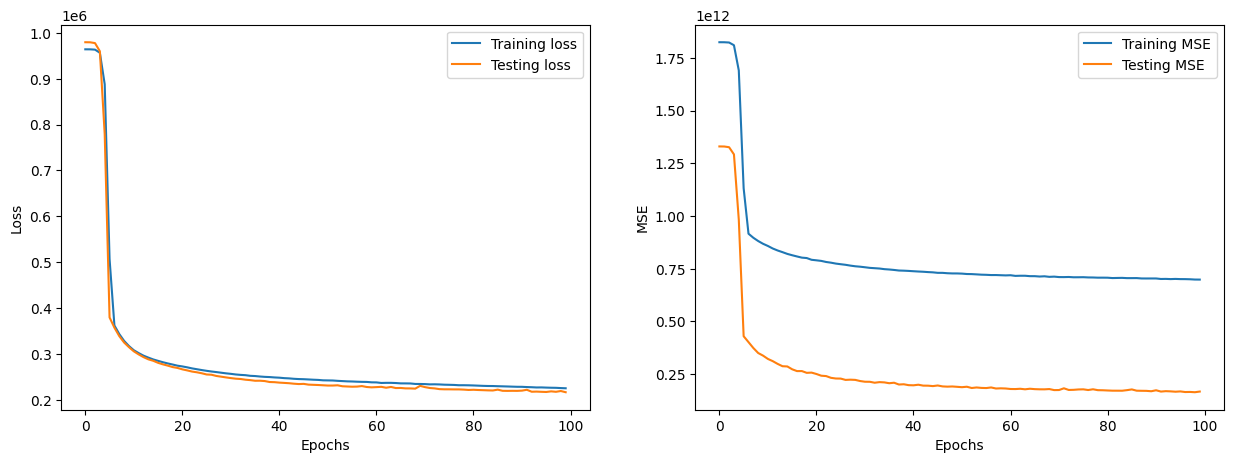

In [488]:
plot_loss_metrics(full_history_1)

## Second Model on full datasets
* Add more layers and neurons
* Using Adam for optimizer

In [489]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
full_model_2 = tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(10),
                  tf.keras.layers.Dense(1)
])

# 2. Compile the model
full_model_2.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(0.01),
                     metrics=["mse"])

# 3. Fit the model
full_history_2 = full_model_2.fit(X_train_normal, y_train, epochs=100, validation_data=(X_test_normal, y_test))

Epoch 1/100
63/63 [==============================] - 2s 8ms/step - loss: 962973.4375 - mse: 1822023614464.0000 - val_loss: 974598.8750 - val_mse: 1320084176896.0000
Epoch 2/100
63/63 [==============================] - 0s 5ms/step - loss: 940652.5625 - mse: 1779980959744.0000 - val_loss: 922538.1875 - val_mse: 1221294817280.0000
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 833577.1875 - mse: 1590140076032.0000 - val_loss: 743808.1250 - val_mse: 922551189504.0000
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 579090.1875 - mse: 1222395166720.0000 - val_loss: 444394.9375 - val_mse: 518253608960.0000
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 378819.2500 - mse: 943118811136.0000 - val_loss: 357760.2812 - val_mse: 381540663296.0000
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 344205.6875 - mse: 885683519488.0000 - val_loss: 339026.4688 - val_mse: 358519209984.0000
Epoch 7/100
63/6

## Third model on full datasets
* Add more neurons in second hidden layer
* Increase the epochs

In [490]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
full_model_3 = tf.keras.Sequential([
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(100),
                  tf.keras.layers.Dense(1)
])

# 2. Compile the model
full_model_3.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(0.1),
                     metrics=["mse"])

# 3. Fit the model
full_history_3 = full_model_3.fit(X_train_normal, y_train, epochs=300, validation_data=(X_test_normal, y_test))

Epoch 1/300
63/63 [==============================] - 1s 5ms/step - loss: 524326.5625 - mse: 1135107899392.0000 - val_loss: 277334.2188 - val_mse: 277949906944.0000
Epoch 2/300
63/63 [==============================] - 0s 4ms/step - loss: 264826.3750 - mse: 765191847936.0000 - val_loss: 243296.5312 - val_mse: 210780700672.0000
Epoch 3/300
63/63 [==============================] - 0s 4ms/step - loss: 249852.8438 - mse: 729720160256.0000 - val_loss: 273176.1250 - val_mse: 188060123136.0000
Epoch 4/300
63/63 [==============================] - 0s 4ms/step - loss: 250231.1562 - mse: 716584124416.0000 - val_loss: 226646.6875 - val_mse: 179640795136.0000
Epoch 5/300
63/63 [==============================] - 0s 3ms/step - loss: 239404.5156 - mse: 708815814656.0000 - val_loss: 229469.4844 - val_mse: 196746346496.0000
Epoch 6/300
63/63 [==============================] - 0s 3ms/step - loss: 238248.5625 - mse: 709702909952.0000 - val_loss: 224526.0781 - val_mse: 164918083584.0000
Epoch 7/300
63/63 [==

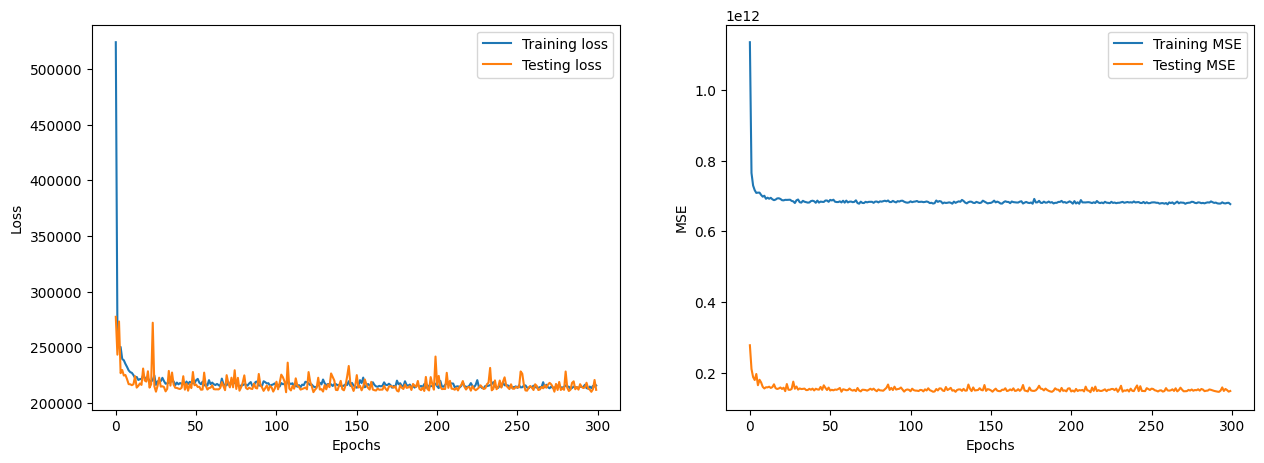

In [491]:
plot_loss_metrics(full_history_3)

## Fourth model on full datasets
* Add hidden layers
* Add more neurons in second hidden layer
* Add activation function `relu` and `linear`

In [492]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
full_model_4 = tf.keras.Sequential([
                  tf.keras.layers.Dense(100, activation="relu"),
                  tf.keras.layers.Dense(100, activation="relu"),
                  tf.keras.layers.Dense(10, activation="relu"),
                  tf.keras.layers.Dense(10, activation="relu"),
                  tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
full_model_4.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(0.1),
                     metrics=["mse"])

# 3. Fit the model
full_history_4 = full_model_4.fit(X_train_normal, y_train, epochs=300, validation_data=(X_test_normal, y_test))

Epoch 1/300
63/63 [==============================] - 2s 6ms/step - loss: 435260.4375 - mse: 999978106880.0000 - val_loss: 252245.3750 - val_mse: 190267932672.0000
Epoch 2/300
63/63 [==============================] - 0s 3ms/step - loss: 261317.7031 - mse: 737078345728.0000 - val_loss: 319722.9062 - val_mse: 202937270272.0000
Epoch 3/300
63/63 [==============================] - 0s 3ms/step - loss: 268626.3750 - mse: 738826059776.0000 - val_loss: 229950.2031 - val_mse: 165548064768.0000
Epoch 4/300
63/63 [==============================] - 0s 4ms/step - loss: 226946.8906 - mse: 699247230976.0000 - val_loss: 218085.7031 - val_mse: 149897216000.0000
Epoch 5/300
63/63 [==============================] - 0s 3ms/step - loss: 227839.8906 - mse: 687385935872.0000 - val_loss: 204947.0625 - val_mse: 159777816576.0000
Epoch 6/300
63/63 [==============================] - 0s 4ms/step - loss: 216803.8594 - mse: 687458680832.0000 - val_loss: 221237.5469 - val_mse: 167506558976.0000
Epoch 7/300
63/63 [===

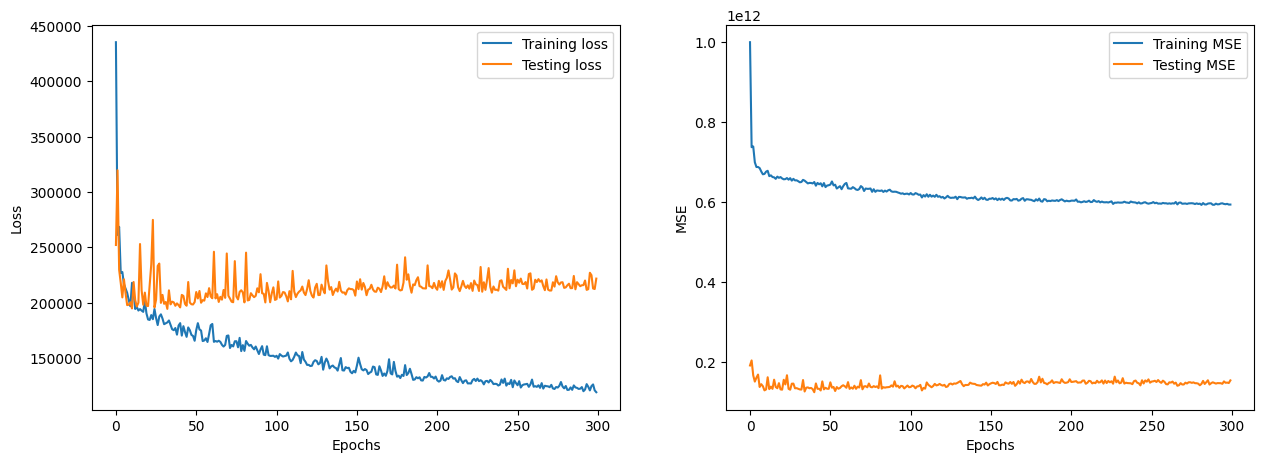

In [493]:
plot_loss_metrics(full_history_4)

## Fifth model on full datasets
* Add more neurons


In [494]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
full_model_5 = tf.keras.Sequential([
                  tf.keras.layers.Dense(200, activation="relu"),
                  tf.keras.layers.Dense(100, activation="relu"),
                  tf.keras.layers.Dense(50, activation="relu"),
                  tf.keras.layers.Dense(50, activation="relu"),
                  tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
full_model_5.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(0.1),
                     metrics=["mse"])

# 3. Fit the model
full_history_5 = full_model_5.fit(X_train_normal, y_train, epochs=300, validation_data=(X_test_normal, y_test))

Epoch 1/300
63/63 [==============================] - 2s 10ms/step - loss: 362817.8438 - mse: 893465133056.0000 - val_loss: 234832.8281 - val_mse: 193950711808.0000
Epoch 2/300
63/63 [==============================] - 0s 5ms/step - loss: 245394.1250 - mse: 723009077248.0000 - val_loss: 377650.2188 - val_mse: 245617131520.0000
Epoch 3/300
63/63 [==============================] - 0s 6ms/step - loss: 248564.5781 - mse: 715330879488.0000 - val_loss: 212896.3906 - val_mse: 152284659712.0000
Epoch 4/300
63/63 [==============================] - 0s 7ms/step - loss: 231584.6094 - mse: 703818956800.0000 - val_loss: 258775.7500 - val_mse: 162224734208.0000
Epoch 5/300
63/63 [==============================] - 0s 6ms/step - loss: 234166.9688 - mse: 697272238080.0000 - val_loss: 217826.7344 - val_mse: 178560909312.0000
Epoch 6/300
63/63 [==============================] - 0s 6ms/step - loss: 221841.1562 - mse: 689405034496.0000 - val_loss: 205149.6875 - val_mse: 156949020672.0000
Epoch 7/300
63/63 [==

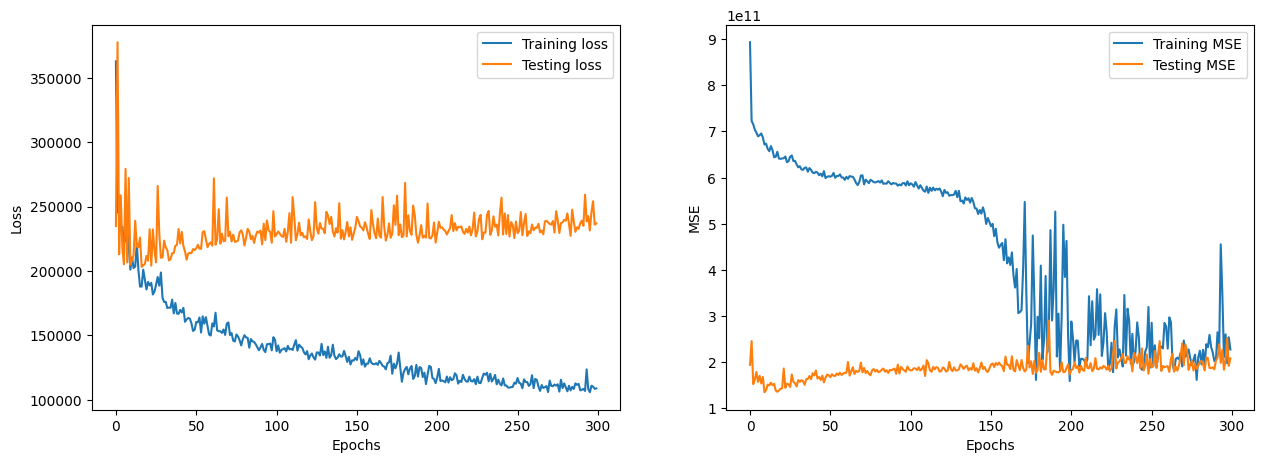

In [495]:
plot_loss_metrics(full_history_5)

## Sixth model on full datasets
* Add more neurons
* Increase epochs

In [496]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
full_model_6 = tf.keras.Sequential([
                  tf.keras.layers.Dense(200, activation="relu"),
                  tf.keras.layers.Dense(100, activation="relu"),
                  tf.keras.layers.Dense(100, activation="relu"),
                  tf.keras.layers.Dense(100, activation="relu"),
                  tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
full_model_6.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(lr=0.01),
                     metrics=["mse"])

# 3. Fit the model
full_history_6 = full_model_6.fit(X_train_normal, y_train, epochs=400, validation_data=(X_test_normal, y_test))

Epoch 1/400
63/63 [==============================] - 2s 7ms/step - loss: 963837.5625 - mse: 1823691374592.0000 - val_loss: 977850.8750 - val_mse: 1326437367808.0000
Epoch 2/400
63/63 [==============================] - 0s 4ms/step - loss: 928343.6875 - mse: 1758002937856.0000 - val_loss: 839328.3750 - val_mse: 1074745376768.0000
Epoch 3/400
63/63 [==============================] - 0s 4ms/step - loss: 516398.5938 - mse: 1132718325760.0000 - val_loss: 359394.3438 - val_mse: 369134534656.0000
Epoch 4/400
63/63 [==============================] - 0s 4ms/step - loss: 339296.1875 - mse: 873403842560.0000 - val_loss: 324784.0000 - val_mse: 335359442944.0000
Epoch 5/400
63/63 [==============================] - 0s 5ms/step - loss: 311953.3750 - mse: 847279095808.0000 - val_loss: 306029.9688 - val_mse: 326732480512.0000
Epoch 6/400
63/63 [==============================] - 0s 4ms/step - loss: 294903.9062 - mse: 828797222912.0000 - val_loss: 284967.3750 - val_mse: 286457266176.0000
Epoch 7/400
63/63

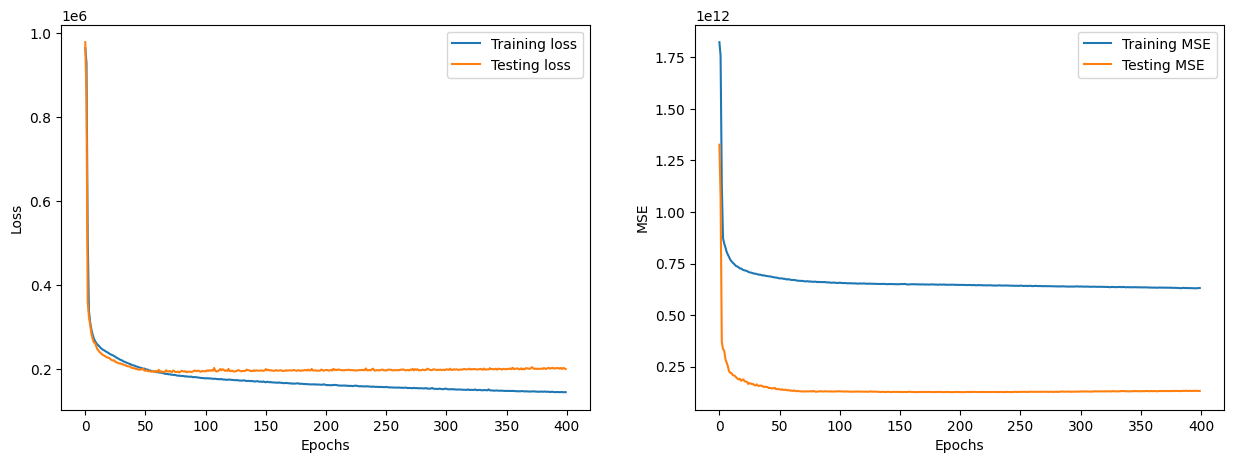

In [497]:
plot_loss_metrics(full_history_6)

## Seventh Model
* Decrease neurons to 50

In [498]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
full_model_7 = tf.keras.Sequential([
                  tf.keras.layers.Dense(200, activation="relu"),
                  tf.keras.layers.Dense(100, activation="relu"),
                  tf.keras.layers.Dense(50, activation="relu"),
                  tf.keras.layers.Dense(50, activation="relu"),
                  tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
full_model_7.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(0.1),
                     metrics=["mse"])

# 3. Fit the model
full_history_7 = full_model_7.fit(X_train_normal, y_train, epochs=400, validation_data=(X_test_normal, y_test))

Epoch 1/400
63/63 [==============================] - 2s 6ms/step - loss: 390453.9688 - mse: 922233143296.0000 - val_loss: 230575.8750 - val_mse: 180909686784.0000
Epoch 2/400
63/63 [==============================] - 0s 4ms/step - loss: 248140.8594 - mse: 722234966016.0000 - val_loss: 276337.3125 - val_mse: 184324800512.0000
Epoch 3/400
63/63 [==============================] - 0s 3ms/step - loss: 242620.2656 - mse: 710953730048.0000 - val_loss: 267223.8125 - val_mse: 161249345536.0000
Epoch 4/400
63/63 [==============================] - 0s 4ms/step - loss: 228418.6562 - mse: 692096925696.0000 - val_loss: 246799.4062 - val_mse: 157436805120.0000
Epoch 5/400
63/63 [==============================] - 0s 5ms/step - loss: 234135.7969 - mse: 692578746368.0000 - val_loss: 207242.1875 - val_mse: 155224735744.0000
Epoch 6/400
63/63 [==============================] - 0s 6ms/step - loss: 210233.1875 - mse: 676188585984.0000 - val_loss: 225068.5625 - val_mse: 175297576960.0000
Epoch 7/400
63/63 [===

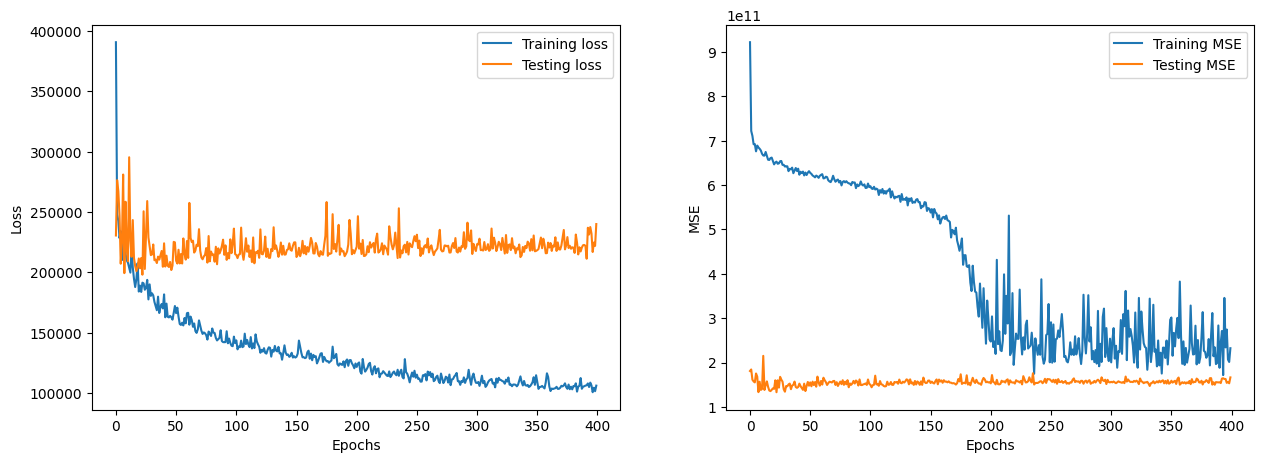

In [499]:
plot_loss_metrics(full_history_7)

## Eight Model

* Increase epochs to 500

In [500]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
full_model_8 = tf.keras.Sequential([
                  tf.keras.layers.Dense(200, activation="relu"),
                  tf.keras.layers.Dense(100, activation="relu"),
                  tf.keras.layers.Dense(50, activation="relu"),
                  tf.keras.layers.Dense(50, activation="relu"),
                  tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
full_model_8.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(0.1),
                     metrics=["mse"])

# 3. Fit the model
full_history_8 = full_model_8.fit(X_train_normal, y_train, epochs=500, validation_data=(X_test_normal, y_test))

Epoch 1/500
63/63 [==============================] - 2s 7ms/step - loss: 373315.1562 - mse: 915066847232.0000 - val_loss: 234467.9062 - val_mse: 190038081536.0000
Epoch 2/500
63/63 [==============================] - 0s 3ms/step - loss: 246438.3281 - mse: 719753904128.0000 - val_loss: 271874.0312 - val_mse: 184315068416.0000
Epoch 3/500
63/63 [==============================] - 0s 4ms/step - loss: 236034.3594 - mse: 704769556480.0000 - val_loss: 219794.3125 - val_mse: 150512697344.0000
Epoch 4/500
63/63 [==============================] - 0s 4ms/step - loss: 224962.6875 - mse: 692286128128.0000 - val_loss: 225425.4844 - val_mse: 147822493696.0000
Epoch 5/500
63/63 [==============================] - 0s 4ms/step - loss: 238771.2656 - mse: 695130390528.0000 - val_loss: 226619.7500 - val_mse: 149971222528.0000
Epoch 6/500
63/63 [==============================] - 0s 4ms/step - loss: 218461.0000 - mse: 686954577920.0000 - val_loss: 203458.4844 - val_mse: 157345333248.0000
Epoch 7/500
63/63 [===

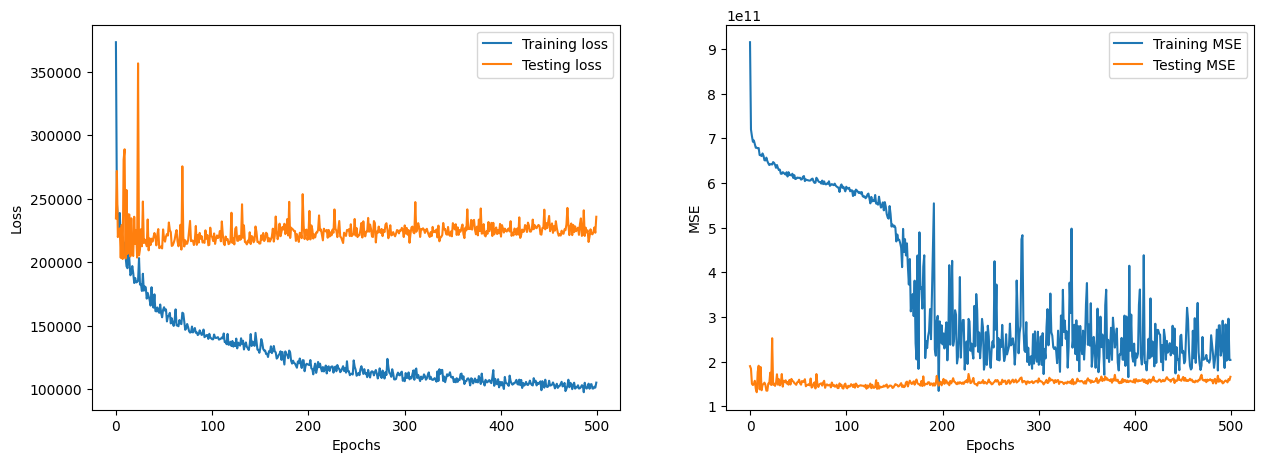

In [501]:
plot_loss_metrics(full_history_8)

## Summary

We already built many models and the best performance for the model is full_model_8 because of the loss is lower than others.